<a href="https://colab.research.google.com/github/raynardj/python4ml/blob/master/experiments/fun_with_optimizer_and_more_fun_with_image_reconstruction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fun With Optimizer & More Fun With Image Rconstruction

### Ray 2019.03.05

Not until the recent years I realize how powerful the optimizer can be. 

The easiness of gradient calculation, the speed of the backpropagation really makes an universal "truth approximater", no matter how noised this path might be.

I hope this understanding brings clarification, inspiration and intuitive understanding of such machanism, and how easy it is to be executed on coding

In [0]:
from torchvision import transforms

In [0]:
import numpy as np
import torch
from torch import nn

Upload the image file

In [0]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving pic.jpg to pic.jpg
User uploaded file "pic.jpg" with length 40389 bytes


In [ ]:
from PIL import Image
img = Image.open("pic.jpg",).resize((600,400))
img

## Perceive Image as numpy array

In [0]:
img2t = transforms.ToTensor()
toimg = transforms.ToPILImage()

In [0]:
img_array = img2t(img)
img_array

tensor([[[0.0118, 0.0118, 0.0118,  ..., 0.0510, 0.0510, 0.0510],
         [0.0157, 0.0157, 0.0157,  ..., 0.0510, 0.0471, 0.0471],
         [0.0157, 0.0157, 0.0157,  ..., 0.0431, 0.0471, 0.0471],
         ...,
         [0.4196, 0.4118, 0.3961,  ..., 0.3529, 0.3529, 0.3529],
         [0.4353, 0.4235, 0.4078,  ..., 0.3098, 0.3059, 0.3020],
         [0.4353, 0.4235, 0.4078,  ..., 0.2863, 0.2824, 0.2706]],

        [[0.0118, 0.0118, 0.0118,  ..., 0.0510, 0.0510, 0.0510],
         [0.0157, 0.0157, 0.0157,  ..., 0.0510, 0.0471, 0.0471],
         [0.0157, 0.0157, 0.0157,  ..., 0.0431, 0.0471, 0.0471],
         ...,
         [0.4235, 0.4157, 0.4000,  ..., 0.0314, 0.0314, 0.0314],
         [0.4392, 0.4275, 0.4118,  ..., 0.0275, 0.0235, 0.0275],
         [0.4392, 0.4275, 0.4118,  ..., 0.0353, 0.0314, 0.0275]],

        [[0.0118, 0.0118, 0.0118,  ..., 0.0510, 0.0510, 0.0510],
         [0.0157, 0.0157, 0.0157,  ..., 0.0510, 0.0471, 0.0471],
         [0.0157, 0.0157, 0.0157,  ..., 0.0431, 0.0471, 0.

In [0]:
img_array.size()

torch.Size([3, 400, 600])

In [ ]:
toimg(img_array)

In [ ]:
toimg(img_array[:,:200,300:])

In [ ]:
img_taint = img_array.clone()
img_taint[:1,:,:200]*=0
img_taint[1:2,:,200:400]*=0
img_taint[2:,:,400:]*=0
toimg(img_taint)

## Try recovering image from noise

In [0]:
start = nn.Parameter(torch.rand(3,400,600))
start

Parameter containing:
tensor([[[0.2788, 0.7462, 0.8447,  ..., 0.1057, 0.7738, 0.0382],
         [0.0331, 0.9278, 0.2746,  ..., 0.9401, 0.3698, 0.6484],
         [0.3480, 0.3600, 0.9633,  ..., 0.0422, 0.3394, 0.0453],
         ...,
         [0.1548, 0.9553, 0.4736,  ..., 0.7825, 0.0075, 0.1345],
         [0.6008, 0.4805, 0.4017,  ..., 0.4213, 0.7599, 0.0818],
         [0.9562, 0.8576, 0.1791,  ..., 0.2678, 0.7224, 0.0426]],

        [[0.7340, 0.1733, 0.6105,  ..., 0.3087, 0.8155, 0.1365],
         [0.8770, 0.8445, 0.4441,  ..., 0.8071, 0.2208, 0.5245],
         [0.4541, 0.3145, 0.7114,  ..., 0.2996, 0.2111, 0.1849],
         ...,
         [0.3666, 0.8784, 0.9778,  ..., 0.2586, 0.9263, 0.3810],
         [0.4254, 0.9088, 0.6684,  ..., 0.5804, 0.4829, 0.0956],
         [0.9881, 0.4966, 0.9429,  ..., 0.1697, 0.3369, 0.5097]],

        [[0.4658, 0.8173, 0.9093,  ..., 0.6518, 0.0302, 0.0815],
         [0.1009, 0.6782, 0.4740,  ..., 0.0558, 0.6187, 0.1130],
         [0.6895, 0.3113, 0.0381,  .

In [ ]:
toimg(start)

In [0]:
start.min(), start.max()

(tensor(8.3447e-07, grad_fn=<MinBackward1>),
 tensor(1.0000, grad_fn=<MaxBackward1>))

### Mean Squared Error
The l2 distance between noise and ground truth image, pixel-wisely

In [0]:
loss = torch.pow((start - img_array),2).mean()

In [0]:
loss

tensor(0.1800, grad_fn=<MeanBackward1>)

Calculate the gradients: 

In [0]:
loss.backward()

In [0]:
start.grad

tensor([[[ 7.4163e-07,  2.0401e-06,  2.3137e-06,  ...,  1.5195e-07,
           2.0080e-06, -3.5366e-08],
         [ 4.8475e-08,  2.5337e-06,  7.1927e-07,  ...,  2.4698e-06,
           8.9657e-07,  1.6705e-06],
         [ 9.2317e-07,  9.5657e-07,  2.6324e-06,  ..., -2.6201e-09,
           8.1196e-07, -4.8732e-09],
         ...,
         [-7.3558e-07,  1.5098e-06,  2.1523e-07,  ...,  1.1932e-06,
          -9.5959e-07, -6.0684e-07],
         [ 4.5983e-07,  1.5830e-07, -1.6982e-08,  ...,  3.0972e-07,
           1.2611e-06, -6.1146e-07],
         [ 1.4469e-06,  1.2058e-06, -6.3546e-07,  ..., -5.1213e-08,
           1.2222e-06, -6.3330e-07]],

        [[ 2.0062e-06,  4.4871e-07,  1.6631e-06,  ...,  7.1598e-07,
           2.1237e-06,  2.3754e-07],
         [ 2.3926e-06,  2.3022e-06,  1.1901e-06,  ...,  2.1004e-06,
           4.8260e-07,  1.3263e-06],
         [ 1.2178e-06,  8.3003e-07,  1.9327e-06,  ...,  7.1230e-07,
           4.5565e-07,  3.8289e-07],
         ...,
         [-1.5818e-07,  1

### Stochastic Gradient Descent (SGD)



In [0]:
alpha = 1e2
def updating_step(number,start):
    loss = torch.pow((torch.sigmoid(start) - img_array),2).mean()
    print(number,"loss:",loss.item())
    loss.backward()
    
    start.data -= start.grad.data * alpha
    return start

0 loss: 0.1467718631029129
1 loss: 0.14676763117313385
2 loss: 0.14675916731357574
3 loss: 0.146746426820755
4 loss: 0.1467294692993164
5 loss: 0.1467083841562271
6 loss: 0.14668291807174683
7 loss: 0.14665324985980988
8 loss: 0.14661931991577148
9 loss: 0.14658123254776
10 loss: 0.14653882384300232
11 loss: 0.14649231731891632
12 loss: 0.14644145965576172
13 loss: 0.14638647437095642
14 loss: 0.1463271975517273
15 loss: 0.14626364409923553
16 loss: 0.14619596302509308
17 loss: 0.14612409472465515
18 loss: 0.14604784548282623
19 loss: 0.14596757292747498
20 loss: 0.1458829641342163
21 loss: 0.14579427242279053
22 loss: 0.14570119976997375
23 loss: 0.1456039845943451
24 loss: 0.14550267159938812
25 loss: 0.14539699256420135
26 loss: 0.14528736472129822
27 loss: 0.14517325162887573
28 loss: 0.14505526423454285
29 loss: 0.14493288099765778
30 loss: 0.1448064148426056
31 loss: 0.14467567205429077
32 loss: 0.14454080164432526
33 loss: 0.14440172910690308
34 loss: 0.14425861835479736
35 loss

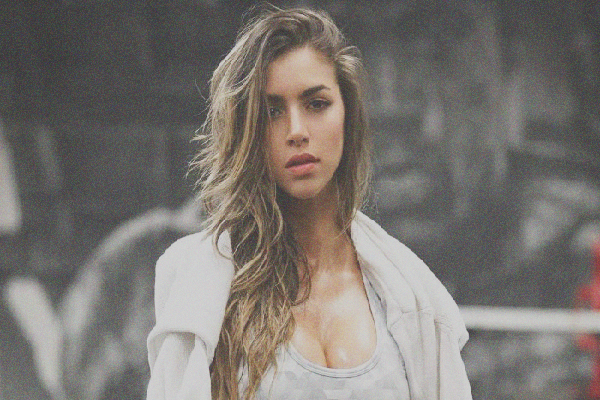

In [0]:
start = nn.Parameter(torch.rand(3,400,600))
for _ in range(300):
    start=updating_step(_,start)
toimg(torch.sigmoid(start))

### Adagrad
[paper on Adagrad](http://jmlr.org/papers/v12/duchi11a.html)

In [0]:
learning_rate = 1e-1


class adagrad(object):
    def __init__(self,learning_rate,param):
        super().__init__()
        self.learning_rate = learning_rate
        self.param = param
        self.init_shape()
        self.step_state = 0
        
    def init_shape(self):
        self.grad_sum_sq = torch.zeros_like(self.param)
        
    def step(self):
        self.step_state+=1
        grad = self.param.grad.data
        self.grad_sum_sq += grad*grad
    
        std = self.grad_sum_sq.sqrt()+1e-10
    
        self.param.data -= grad * (self.learning_rate / std)

0 loss: 0.1466194987297058
1 loss: 0.13107295334339142
2 loss: 0.11793705821037292
3 loss: 0.10682769119739532
4 loss: 0.09727270156145096
5 loss: 0.08894258737564087
6 loss: 0.08160160481929779
7 loss: 0.07507545500993729
8 loss: 0.0692354291677475
9 loss: 0.06398089230060577
10 loss: 0.05923176929354668
11 loss: 0.05492328479886055
12 loss: 0.05100149288773537
13 loss: 0.0474223755300045
14 loss: 0.044148437678813934
15 loss: 0.041147101670503616
16 loss: 0.03839041292667389
17 loss: 0.03585457801818848
18 loss: 0.03351862356066704
19 loss: 0.031363971531391144
20 loss: 0.02937432937324047
21 loss: 0.02753506973385811
22 loss: 0.02583305351436138
23 loss: 0.02425689809024334
24 loss: 0.022796345874667168
25 loss: 0.021441861987113953
26 loss: 0.020184757187962532
27 loss: 0.019017420709133148
28 loss: 0.017932923510670662
29 loss: 0.016924941912293434
30 loss: 0.015987705439329147
31 loss: 0.01511597353965044
32 loss: 0.014304855838418007
33 loss: 0.013549820519983768
34 loss: 0.0128

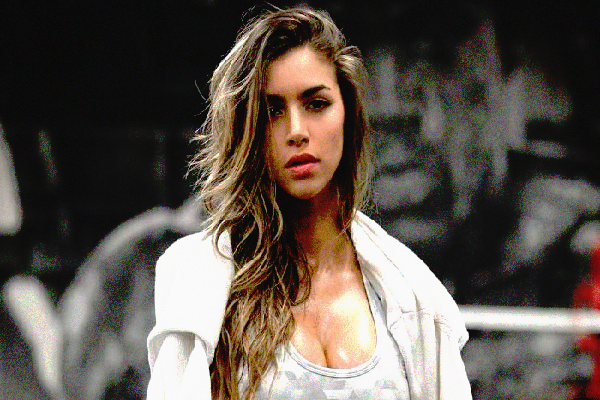

In [0]:
start = nn.Parameter(torch.rand(3,400,600))
opt = adagrad(learning_rate = learning_rate,
              param = start)

for _ in range(200):
    loss = torch.pow((torch.sigmoid(start) - img_array),2).mean()
    print(_,"loss:",loss.item())
    loss.backward()
    opt.step()
toimg(torch.sigmoid(start))

## Adam Adaptive SGD with Momentum

In [0]:
learning_rate = 1e-2
import math


class adam(object):
    def __init__(self,learning_rate,param,beta1=0.9, beta2 = 0.999):
        super().__init__()
        self.learning_rate = learning_rate
        self.param = param
        self.init_shape()
        self.beta1 = beta1 #adam +
        self.beta2 = beta2 #adam +
        self.step_state = 0
        
    def init_shape(self):
        self.grad_sum_sq = torch.zeros_like(self.param)
        self.grad_sum = torch.zeros_like(self.param) # adam +
        
    def step(self):
        self.step_state+=1
        grad = self.param.grad.data
        
        self.grad_sum = self.grad_sum*self.beta1 + (1-self.beta1)*grad # adam +
        self.grad_sum_sq = self.grad_sum_sq*self.beta2 + (1-self.beta2)*grad*grad # adam +-
        
        step_size = self.learning_rate 
        
        # bias_correction1 = 1 - self.beta1 ** self.step_state
        # bias_correction2 = 1 - self.beta2 ** self.step_state
        
        # step_size *= math.sqrt(bias_correction2) / bias_correction1
        
        std = self.grad_sum_sq.sqrt()+1e-10
    
        self.param.data -= grad * (step_size / std)

0 loss: 0.14685101807117462
1 loss: 0.10116212069988251
2 loss: 0.0684303566813469
3 loss: 0.04614761099219322
4 loss: 0.03123256377875805
5 loss: 0.021427802741527557
6 loss: 0.015043665654957294
7 loss: 0.010985839180648327
8 loss: 0.008486950770020485
9 loss: 0.006993461865931749
10 loss: 0.006189466919749975
11 loss: 0.005829802714288235
12 loss: 0.005738279316574335
13 loss: 0.005834181793034077
14 loss: 0.006039885804057121
15 loss: 0.006296713370829821
16 loss: 0.006588001735508442
17 loss: 0.006892513018101454
18 loss: 0.007188824471086264
19 loss: 0.007474188227206469
20 loss: 0.007745935115963221
21 loss: 0.007998154498636723
22 loss: 0.008230749517679214
23 loss: 0.008442983962595463
24 loss: 0.008634462021291256
25 loss: 0.008809400722384453
26 loss: 0.008968603797256947
27 loss: 0.00910921674221754
28 loss: 0.009234574623405933
29 loss: 0.009349765256047249
30 loss: 0.009452667087316513
31 loss: 0.009541032835841179
32 loss: 0.009619241580367088
33 loss: 0.0096908546984195

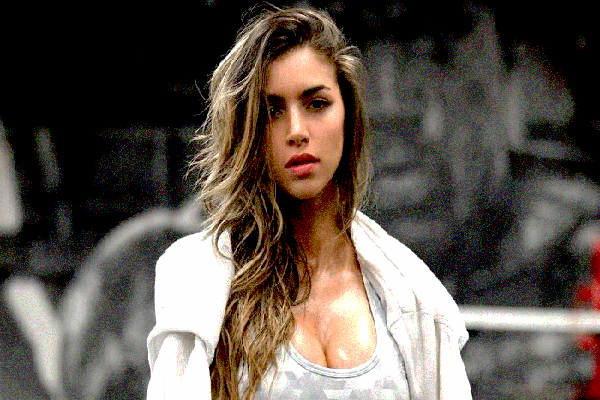

In [0]:
start = nn.Parameter(torch.rand(3,400,600))
opt = adam(learning_rate = learning_rate,
              param = start)

for _ in range(200):
    loss = torch.pow((torch.sigmoid(start) - img_array),2).mean()
    print(_,"loss:",loss.item())
    loss.backward()
    opt.step()
toimg(torch.sigmoid(start))

# Content Reconstruction

In [0]:
from torchvision.models.vgg import vgg19
from torchvision import transforms

In [0]:
CUDA = torch.cuda.is_available()
print(CUDA)

True


In [0]:
vgg = vgg19(pretrained=True)
if CUDA: vgg.cuda()

Downloading: "https://download.pytorch.org/models/vgg19-dcbb9e9d.pth" to /root/.torch/models/vgg19-dcbb9e9d.pth
574673361it [00:06, 90114310.44it/s]


In [0]:
conv_layers = vgg.features[:6]
conv_layers

Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
)

In [0]:
norm = transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])

In [0]:
class normalize(nn.Module):
    def __init__(self,mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]):
        super().__init__()
        self.mean = torch.tensor(mean, dtype=torch.float32)
        self.std = torch.tensor(std, dtype=torch.float32)
        
    def forward(self,tensor):
        return tensor.sub(self.mean[:, None, None]).div(self.std[:, None, None])
norm = normalize()
if CUDA: norm.mean = norm.mean.cuda();norm.std = norm.std.cuda()

In [0]:
img_tensor = img2t(img).cuda() if CUDA else img2t(img)
img_input = norm(img_tensor).unsqueeze(0)
print(img_input.size())
img_input

torch.Size([1, 3, 400, 600])


tensor([[[[-2.0665, -2.0665, -2.0665,  ..., -1.8953, -1.8953, -1.8953],
          [-2.0494, -2.0494, -2.0494,  ..., -1.8953, -1.9124, -1.9124],
          [-2.0494, -2.0494, -2.0494,  ..., -1.9295, -1.9124, -1.9124],
          ...,
          [-0.2856, -0.3198, -0.3883,  ..., -0.5767, -0.5767, -0.5767],
          [-0.2171, -0.2684, -0.3369,  ..., -0.7650, -0.7822, -0.7993],
          [-0.2171, -0.2684, -0.3369,  ..., -0.8678, -0.8849, -0.9363]],

         [[-1.9832, -1.9832, -1.9832,  ..., -1.8081, -1.8081, -1.8081],
          [-1.9657, -1.9657, -1.9657,  ..., -1.8081, -1.8256, -1.8256],
          [-1.9657, -1.9657, -1.9657,  ..., -1.8431, -1.8256, -1.8256],
          ...,
          [-0.1450, -0.1800, -0.2500,  ..., -1.8957, -1.8957, -1.8957],
          [-0.0749, -0.1275, -0.1975,  ..., -1.9132, -1.9307, -1.9132],
          [-0.0749, -0.1275, -0.1975,  ..., -1.8782, -1.8957, -1.9132]],

         [[-1.7522, -1.7522, -1.7522,  ..., -1.5779, -1.5779, -1.5779],
          [-1.7347, -1.7347, -

In [0]:
activ = conv_layers(img_input)

In [0]:
activ.size()

torch.Size([1, 128, 200, 300])

In [0]:
start = nn.Parameter(torch.rand(3,400,600,requires_grad=True,device="cuda"),)

conv_layers(norm(start).unsqueeze(0)).size()

torch.Size([1, 128, 200, 300])

In [0]:
from torch.optim import Adam

opt = Adam([start], lr=1e-2)
mse_func = nn.MSELoss()


for i in range(500):
    opt.zero_grad()
    activ = conv_layers(img_input).detach()
    activ_2 = conv_layers(norm(start).unsqueeze(0))
    
    mse = mse_func(activ_2,activ)
    
    mse.backward()
    opt.step()
    
    print(i,"mse",mse.item())
    


0 mse 145.80332946777344
1 mse 132.71768188476562
2 mse 120.69867706298828
3 mse 109.6976318359375
4 mse 99.66309356689453
5 mse 90.53663635253906
6 mse 82.26497650146484
7 mse 74.78258514404297
8 mse 68.02782440185547
9 mse 61.94236755371094
10 mse 56.46793746948242
11 mse 51.54798889160156
12 mse 47.128684997558594
13 mse 43.16096115112305
14 mse 39.59831237792969
15 mse 36.398441314697266
16 mse 33.522945404052734
17 mse 30.937070846557617
18 mse 28.60945701599121
19 mse 26.51146697998047
20 mse 24.616891860961914
21 mse 22.90288734436035
22 mse 21.348758697509766
23 mse 19.9361629486084
24 mse 18.649789810180664
25 mse 17.475341796875
26 mse 16.400110244750977
27 mse 15.413433074951172
28 mse 14.506754875183105
29 mse 13.672187805175781
30 mse 12.902647972106934
31 mse 12.191054344177246
32 mse 11.531800270080566
33 mse 10.920071601867676
34 mse 10.35143756866455
35 mse 9.822157859802246
36 mse 9.329095840454102
37 mse 8.868945121765137
38 mse 8.43901252746582
39 mse 8.037177085876

In [ ]:
start = start.cpu() if CUDA else start
toimg(start.detach())

In [0]:
def tv_func(y):
    """
    total variation loss function
    return the total variation of an image
    measures how much a pixel varies to its neighbour
    """
    return torch.sum(torch.abs(y[:, :, :, :-1] - y[:, :, :, 1:]))+torch.sum(torch.abs(y[:, :, :-1, :] - y[:, :, 1:, :]))

In [0]:
start = nn.Parameter(torch.rand(3,400,600,requires_grad=True,device="cuda"),)

conv_layers(norm(start).unsqueeze(0)).size()

torch.Size([1, 128, 200, 300])

In [0]:
from torch.optim import Adam

opt = Adam([start], lr=1e-2)
mse_func = nn.MSELoss()


for i in range(500):
    opt.zero_grad()
    activ = conv_layers(img_input).detach()
    activ_2 = conv_layers(norm(start).unsqueeze(0))
    
    tv = tv_func(norm(start).unsqueeze(0))
    
    mse = mse_func(activ_2,activ) + tv * 1e-5
    
    mse.backward()
    opt.step()
    
    print(i,"mse",mse.item())

0 mse 167.22547912597656
1 mse 153.81492614746094
2 mse 141.48020935058594
3 mse 130.1719512939453
4 mse 119.84009552001953
5 mse 110.42658996582031
6 mse 101.87169647216797
7 mse 94.11479187011719
8 mse 87.0950927734375
9 mse 80.75447082519531
10 mse 75.03240966796875
11 mse 69.87010192871094
12 mse 65.21727752685547
13 mse 61.023292541503906
14 mse 57.241783142089844
15 mse 53.830570220947266
16 mse 50.75071716308594
17 mse 47.966068267822266
18 mse 45.44477081298828
19 mse 43.15708923339844
20 mse 41.07489013671875
21 mse 39.17540740966797
22 mse 37.43865966796875
23 mse 35.84708786010742
24 mse 34.383201599121094
25 mse 33.033660888671875
26 mse 31.785560607910156
27 mse 30.627002716064453
28 mse 29.549283981323242
29 mse 28.543811798095703
30 mse 27.603227615356445
31 mse 26.720905303955078
32 mse 25.89133071899414
33 mse 25.10993003845215
34 mse 24.37166976928711
35 mse 23.67286491394043
36 mse 23.01013946533203
37 mse 22.380535125732422
38 mse 21.781526565551758
39 mse 21.211040

In [ ]:
start = start.cpu() if CUDA else start
toimg(start.detach())